## CNNs

*Graysacle* - 1 channel ``torch.Tensor([1, height, width])``

*Color* - 3 channels  ``torch.Tensor([3, height, width])``




In [12]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from torchvision.utils import make_grid

In [13]:
BATCH_SIZE = 12
NUM_CLASSES = 5
LR = 0.001
NUM_EPOCHS = 20
IMAGE_SIZE = 64

def label_to_piece(label: int):
    labels = {
        0: "Bishop",
        1: "Knight",
        2: "Pawn",
        3: "Queen",
        4: "Rook"
    }
    return labels[label]

def load_images():
    folder = datasets.ImageFolder("chess/archive/", transform=transforms.Compose([
        transforms.RandomRotation(20),
        transforms.RandomHorizontalFlip(),
        transforms.Resize((64,64)),
        transforms.ToTensor()
    ]))
    loader = DataLoader(dataset=folder, batch_size=BATCH_SIZE, shuffle=True)
    return loader

def show_image(image: torch.Tensor, label: int):
    piece = label_to_piece(label)
    print(piece)
    plt.imshow(image.permute(1, 2, 0))


In [14]:
loader = load_images()

def show_images(images, labels):
    fig, ax = plt.subplots(figsize=(20,6))
    ax.set_xticks([]); ax.set_yticks([])
    print([ label_to_piece(int(label)) for label in labels[0:6]])
    print([ label_to_piece(int(label)) for label in labels[6:12]])
    ax.imshow(
        make_grid(
            images.detach()[:64], 
            nrow=6
        ).permute(1, 2, 0)
    )

['Knight', 'Rook', 'Rook', 'Bishop', 'Knight', 'Knight']
['Pawn', 'Bishop', 'Knight', 'Queen', 'Queen', 'Knight']


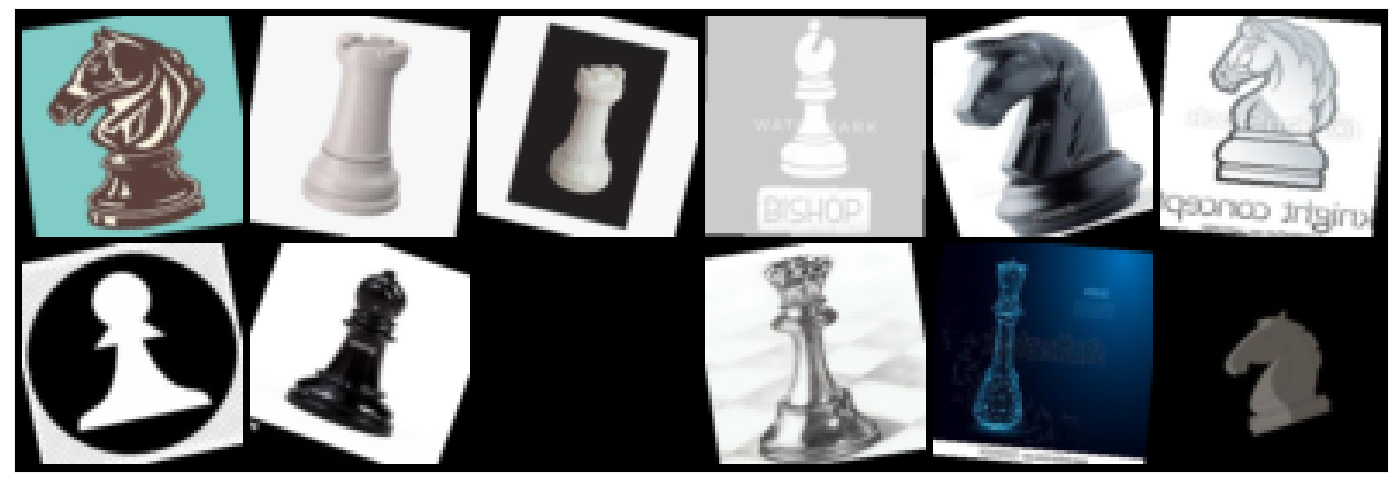

In [15]:
images, labels = next(iter(loader))
show_images(images, labels)

In [19]:
# Creating a CNN class
class ConvNeuralNet(nn.Module):
	#  Determine what layers and their order in CNN object 
    def __init__(self, num_classes):
        super(ConvNeuralNet, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=IMAGE_SIZE, kernel_size=3)
        self.conv_layer2 = nn.Conv2d(in_channels=IMAGE_SIZE, out_channels=IMAGE_SIZE, kernel_size=3)
        self.max_pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.conv_layer3 = nn.Conv2d(in_channels=IMAGE_SIZE, out_channels=IMAGE_SIZE*2, kernel_size=3)
        self.conv_layer4 = nn.Conv2d(in_channels=IMAGE_SIZE*2, out_channels=IMAGE_SIZE*2, kernel_size=3)
        self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.fc1 = nn.Linear(21632, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
    
    # Progresses data across layers    
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.conv_layer2(out)
        out = self.max_pool1(out)
        
        out = self.conv_layer3(out)
        out = self.conv_layer4(out)
        out = self.max_pool2(out)
                
        out = out.reshape(out.size(0), -1)
        
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [20]:
model = ConvNeuralNet(NUM_CLASSES)

# Set Loss function with criterion
criterion = nn.CrossEntropyLoss()

# Set optimizer with optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=LR, weight_decay = 0.005, momentum = 0.9)  

total_step = len(loader)

In [21]:
# We use the pre-defined number of epochs to determine how many iterations to train the network on
for epoch in range(NUM_EPOCHS):
	#Load in the data in batches using the train_loader object
    for i, (images, labels) in enumerate(loader):  
        # Move tensors to the configured device
        images = images
        labels = labels
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, NUM_EPOCHS, loss.item()))

            
          

Epoch [1/20], Loss: 1.6175
Epoch [2/20], Loss: 1.4874
Epoch [3/20], Loss: 1.6469
Epoch [4/20], Loss: 1.7422
Epoch [5/20], Loss: 1.4981
Epoch [6/20], Loss: 1.5587
Epoch [7/20], Loss: 1.5693
Epoch [8/20], Loss: 1.6383
Epoch [9/20], Loss: 1.3442
Epoch [10/20], Loss: 1.5437
Epoch [11/20], Loss: 1.6359
Epoch [12/20], Loss: 1.4734
Epoch [13/20], Loss: 1.5417
Epoch [14/20], Loss: 1.5987
